In [9]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf 
import matplotlib.pyplot as plt
import json
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Import Data

In [17]:
dataset = pd.read_csv('../data/data_rach_left.csv', index_col=0)
dataset['label'] = [int(s[-1]) for s in dataset['label']]
dataset

,index,middle,ring,pinky,label
0,"[757.0, 757.0, 757.0, 757.0, 756.9, 756.8, 756...","[676.0, 676.0, 676.1, 676.1, 676.2, 676.3, 676...","[786.4, 786.4, 786.4, 786.5, 786.6, 786.7, 786...","[1023.0, 1023.0, 1023.0, 1023.0, 1023.0, 1023....",0
1,"[755.6, 755.6, 755.5, 755.3, 755.0, 754.5, 754...","[677.6, 677.6, 677.6, 677.7, 677.7, 677.6, 677...","[793.0, 792.9, 792.8, 792.7, 792.6, 792.5, 792...","[1023.0, 1023.0, 1023.0, 1023.0, 1023.0, 1023....",0
2,"[752.2, 752.1, 752.0, 751.9, 751.8, 751.6, 751...","[675.2, 675.3, 675.4, 675.4, 675.5, 675.6, 675...","[787.0, 786.9, 786.9, 786.9, 786.8, 786.7, 786...","[1023.0, 1023.0, 1023.0, 1023.0, 1023.0, 1023....",0
3,"[750.8, 750.8, 750.7, 750.6, 750.5, 750.4, 750...","[674.0, 674.0, 674.0, 674.1, 674.2, 674.3, 674...","[786.4, 786.5, 786.5, 786.5, 786.4, 786.2, 786...","[1023.0, 1023.0, 1023.0, 1023.0, 1023.0, 1023....",0
4,"[750.2, 750.1, 750.0, 749.9, 749.8, 749.5, 749...","[674.0, 674.0, 674.1, 674.1, 674.1, 674.1, 674...","[785.2, 785.2, 785.1, 785.0, 784.9, 784.6, 784...","[1023.0, 1023.0, 1023.0, 1023.0, 1023.0, 1023....",0
...,...,...,...,...,...
2495,"[593.0, 593.0, 592.9, 592.7, 592.5, 592.2, 591...","[516.2, 516.1, 515.9, 515.5, 514.9, 514.2, 513...","[627.4, 627.4, 627.3, 627.2, 626.9, 626.6, 626...","[603.0, 603.0, 602.7, 602.0, 600.0, 598.4, 596...",4
2496,"[589.0, 589.0, 589.1, 589.2, 589.3, 589.4, 589...","[507.0, 506.9, 506.8, 506.7, 506.5, 506.3, 506...","[622.6, 622.6, 622.6, 622.6, 622.7, 622.8, 622...","[593.2, 593.2, 593.3, 593.4, 593.4, 593.4, 593...",4
2497,"[592.2, 592.2, 592.1, 592.0, 591.8, 591.6, 591...","[507.4, 507.3, 507.2, 507.0, 506.7, 506.3, 505...","[620.6, 620.6, 620.5, 620.4, 620.4, 620.5, 620...","[595.8, 595.6, 595.5, 595.4, 595.2, 594.3, 593...",4
2498,"[594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594...","[516.8, 516.8, 516.6, 516.2, 515.7, 515.1, 514...","[623.2, 623.2, 623.1, 622.9, 622.6, 622.2, 621...","[592.8, 592.8, 592.7, 592.6, 592.5, 592.4, 592...",4


# Create Train/Val/Test Dataset

In [18]:
## X
n_steps = len(json.loads(dataset.iloc[0,0]))
n_features = 4
X = np.empty((dataset.shape[0], n_steps*n_features), dtype=np.float64)
for i in range(X.shape[0]):    
    x = []
    for j in range(n_features):
        arr = list(json.loads(dataset.iloc[i,j]))
        x += arr
    if not len(x):
        print(i)
    X[i] = np.array(x)

## y
labels = dataset["label"].to_numpy()
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
n_classes = len(np.unique(y_encoded))
y = to_categorical(y_encoded)

## split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
print(x_train.shape, y_train.shape)

(1750, 40) (1750, 5)


# Model Training

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_dense (Dense)         (None, 128)               5248      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 second_dense (Dense)        (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 third_dense (Dense)         (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 fourth_dense (Dense)        (None, 32)               

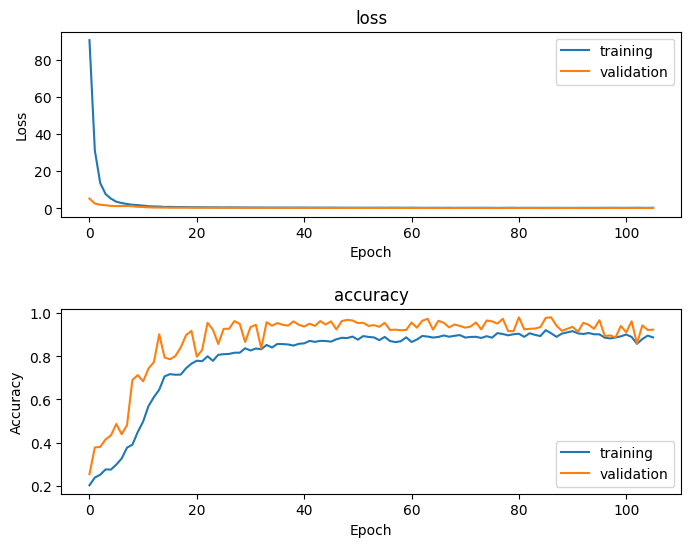

In [19]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_steps*n_features,), name='first_dense'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', name='second_dense'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', name='third_dense'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', name='fourth_dense'))
model.add(Dense(n_classes, activation='softmax', name='final_dense'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the MLP model.
callback = EarlyStopping(patience=10)
history = model.fit(x_train, y_train, epochs=150, batch_size=128, validation_data=(x_val, y_val), callbacks=[callback])
fig, axes = plt.subplots(2,1, figsize=(8,6))
axes[0].plot(history.epoch,history.history['loss'], label='training')
axes[0].plot(history.epoch,history.history['val_loss'], label='validation')
axes[0].set_title('loss')
axes[0].legend(loc='best')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
fig.subplots_adjust(hspace=0.5)
axes[1].plot(history.epoch,history.history['accuracy'], label='training')
axes[1].plot(history.epoch,history.history['val_accuracy'], label='validation')
axes[1].set_title('accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best');

In [20]:
print("Train accuracy:", history.history["accuracy"][-1])
print("Validation accuracy:", history.history["val_accuracy"][-1])

Train accuracy: 0.8880000114440918
Validation accuracy: 0.9240000247955322


# Model Evaluation

In [23]:
# model.save("../models/mlp_rach_left")
model = keras.models.load_model("../models/mlp_rach_left")

Precision: 0.9450943284891256
Recall: 0.9234762037136843
F1-score: 0.9239366578662395


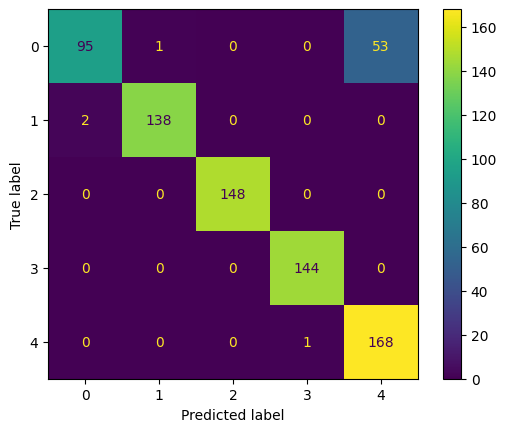

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import seaborn as sn
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(x_val, verbose=0)
y_pred_rd = np.argmax(y_pred, axis=1)
y_val_rd = np.argmax(y_val, axis=1)

print("Precision:", precision_score(y_val_rd, y_pred_rd, average="macro"))
print("Recall:", recall_score(y_val_rd, y_pred_rd, average="macro"))
print("F1-score:", f1_score(y_val_rd, y_pred_rd, average="macro"))

cm = confusion_matrix(y_val_rd, y_pred_rd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(n_classes))
disp.plot()
# df_cm = pd.DataFrame(cm, range(n_classes), range(n_classes))
# # plt.figure(figsize=(13,11))
# # sn.set(font_scale=1) # for label size
# ticklabels = np.unique(labels)
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt="d",
#            xticklabels=ticklabels, yticklabels=ticklabels) # font size
plt.show()

In [25]:
import time 
times = []
for i in range(100):
    start = time.time()
    y_prediction = model.predict(x_val, verbose=0) 
    end = time.time()
    times.append((end - start)/x_val.shape[0] * 1000)
print("Inference time: %f ms" % (np.mean(np.array(times))))

Inference time: 0.070240 ms


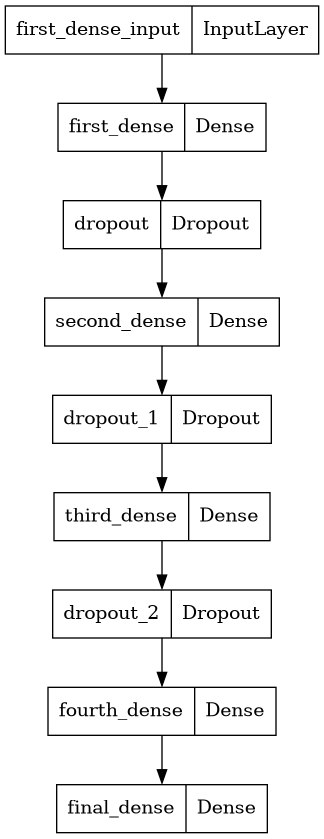

In [4]:
keras.utils.plot_model(model)